Mean Absolute Error on Test Set: 0.96 days


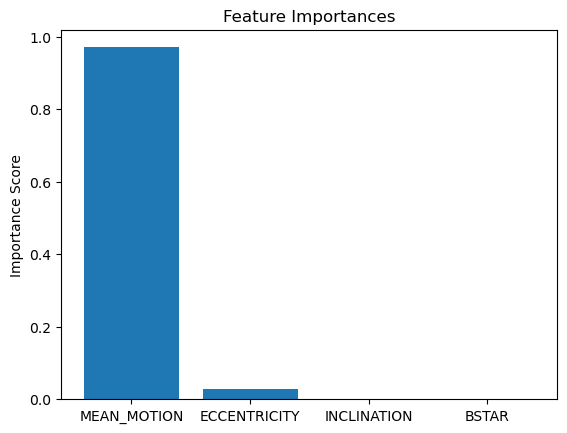

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 1. Load the Space-Track TLE data
tle_df = pd.read_csv('data/test.csv')

# 2. Check & clean the dataset
tle_df = tle_df[['NORAD_CAT_ID', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'BSTAR']]
tle_df.dropna(inplace=True)  # Drop rows with missing values

# 3. Convert EPOCH to datetime
tle_df['EPOCH'] = pd.to_datetime(tle_df['EPOCH'])

# 4. Sample Decay DataFrame (replace with actual decay dates when available)
# For demonstration, let's assume decay happens 20-100 days after the latest TLE EPOCH
import numpy as np
decay_df = tle_df[['NORAD_CAT_ID', 'EPOCH']].drop_duplicates(subset='NORAD_CAT_ID')
decay_df['DECAY_DATE'] = decay_df['EPOCH'] + pd.to_timedelta(np.random.randint(20, 100, size=len(decay_df)), unit='d')

# 5. Merge TLE with Decay Dates
merged_df = tle_df.merge(decay_df[['NORAD_CAT_ID', 'DECAY_DATE']], on='NORAD_CAT_ID')

# 6. Calculate Days to Decay
merged_df['DAYS_TO_DECAY'] = (merged_df['DECAY_DATE'] - merged_df['EPOCH']).dt.days

# 7. Prepare Features and Target
features = ['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'BSTAR']
X = merged_df[features]
y = merged_df['DAYS_TO_DECAY']

# 8. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Model Training - Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 10. Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error on Test Set: {mae:.2f} days")

# 11. Feature Importance
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.bar(features, importances)
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.show()
